In [2]:
# mount notebook onto drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# unzip file

!unzip '/content/drive/MyDrive/archive (2).zip' -d '/content/drive/MyDrive/Animals'


Archive:  /content/drive/MyDrive/archive (2).zip
replace /content/drive/MyDrive/Animals/mammals/african_elephant/african_elephant-0001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
# show contents of unzipped file

!ls /content/drive/MyDrive/Animals/mammals


african_elephant  badger      highland_cattle  mountain_goat  rhinoceros    vampire_bat    wombat
alpaca		  blue_whale  horse	       opossum	      seal	    vicuna	   yak
american_bison	  brown_bear  jackal	       orangutan      sea_lion	    walrus	   zebra
anteater	  camel       kangaroo	       otter	      snow_leopard  warthog
arctic_fox	  dolphin     koala	       polar_bear     squirrel	    water_buffalo
armadillo	  giraffe     manatee	       porcupine      sugar_glider  weasel
baboon		  groundhog   mongoose	       red_panda      tapir	    wildebeest


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os

# Check if GPU is available and set the device accordingly
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda:0


In [6]:
import shutil
import numpy as np

def split_data(source_folder, target_folder, train_size=0.7, val_size=0.2):
    # Ensure train_size and val_size sum up to less than 1
    if train_size + val_size >= 1:
        raise ValueError("train_size and val_size sum should be less than 1")

    classes = os.listdir(source_folder)
    for cls in classes:
        os.makedirs(os.path.join(target_folder, 'train', cls), exist_ok=True)
        os.makedirs(os.path.join(target_folder, 'val', cls), exist_ok=True)
        os.makedirs(os.path.join(target_folder, 'test', cls), exist_ok=True)

        # Get a list of pictures
        all_images = os.listdir(os.path.join(source_folder, cls))
        np.random.shuffle(all_images)  # Shuffle the list

        # Calculate split indices
        train_split_index = int(len(all_images) * train_size)
        val_split_index = train_split_index + int(len(all_images) * val_size)

        # Splitting the dataset
        train_images = all_images[:train_split_index]
        val_images = all_images[train_split_index:val_split_index]
        test_images = all_images[val_split_index:]

        # Copying files to train, val, and test directories
        for image in train_images:
            source_path = os.path.join(source_folder, cls, image)
            dest_path = os.path.join(target_folder, 'train', cls, image)
            shutil.copyfile(source_path, dest_path)

        for image in val_images:
            source_path = os.path.join(source_folder, cls, image)
            dest_path = os.path.join(target_folder, 'val', cls, image)
            shutil.copyfile(source_path, dest_path)

        for image in test_images:
            source_path = os.path.join(source_folder, cls, image)
            dest_path = os.path.join(target_folder, 'test', cls, image)
            shutil.copyfile(source_path, dest_path)

# Usage
source_folder = '/content/drive/MyDrive/Animals/mammals' # Your original folder
target_folder = '/content/mammals_dataset' # Where to save the reorganized structure
split_data(source_folder, target_folder)


In [7]:
from torchvision import datasets, transforms

# Define your transformations here
train_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Ensure these paths are set to where your data is
train_dir = '/content/mammals_dataset/train'
val_dir = '/content/mammals_dataset/val'
test_dir = '/content/mammals_dataset/test'

# Load the datasets with ImageFolder
train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
val_data = datasets.ImageFolder(val_dir, transform=val_transforms)
test_data = datasets.ImageFolder(test_dir, transform=test_transforms)


In [8]:
# Paths to your datasets
train_dir = '/content/mammals_dataset/train'
val_dir = '/content/mammals_dataset/val'
test_dir = '/content/mammals_dataset/test'

# Load the datasets
train_data = datasets.ImageFolder(train_dir)
val_data = datasets.ImageFolder(val_dir)
test_data = datasets.ImageFolder(test_dir)

def display_dataset_info(data, data_name):
    print(f"\n{data_name} Dataset:")
    print(f"Total number of classes: {len(data.classes)}")
    print(f"Class names to index mapping: {data.class_to_idx}")

    class_counts = {}
    for _, label in data.imgs:
        class_name = data.classes[label]
        class_counts[class_name] = class_counts.get(class_name, 0) + 1

    for class_name, count in class_counts.items():
        print(f"Class '{class_name}' has {count} images")

    print(f"Total images in {data_name}: {len(data)}")

# Display information for each dataset
display_dataset_info(train_data, "Training")
display_dataset_info(val_data, "Validation")
display_dataset_info(test_data, "Testing")



Training Dataset:
Total number of classes: 45
Class names to index mapping: {'african_elephant': 0, 'alpaca': 1, 'american_bison': 2, 'anteater': 3, 'arctic_fox': 4, 'armadillo': 5, 'baboon': 6, 'badger': 7, 'blue_whale': 8, 'brown_bear': 9, 'camel': 10, 'dolphin': 11, 'giraffe': 12, 'groundhog': 13, 'highland_cattle': 14, 'horse': 15, 'jackal': 16, 'kangaroo': 17, 'koala': 18, 'manatee': 19, 'mongoose': 20, 'mountain_goat': 21, 'opossum': 22, 'orangutan': 23, 'otter': 24, 'polar_bear': 25, 'porcupine': 26, 'red_panda': 27, 'rhinoceros': 28, 'sea_lion': 29, 'seal': 30, 'snow_leopard': 31, 'squirrel': 32, 'sugar_glider': 33, 'tapir': 34, 'vampire_bat': 35, 'vicuna': 36, 'walrus': 37, 'warthog': 38, 'water_buffalo': 39, 'weasel': 40, 'wildebeest': 41, 'wombat': 42, 'yak': 43, 'zebra': 44}
Class 'african_elephant' has 242 images
Class 'alpaca' has 233 images
Class 'american_bison' has 240 images
Class 'anteater' has 209 images
Class 'arctic_fox' has 220 images
Class 'armadillo' has 231 i

Tensor shape: torch.Size([3, 256, 256])
Tensor datatype: torch.float32
Image label: african_elephant (Label index: 0)


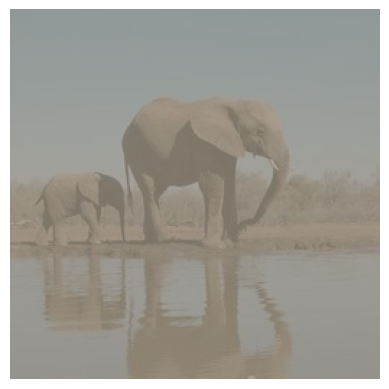

In [9]:
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Make sure you have defined class_names from your dataset
class_names = train_data.classes

# Retrieve the first image and its label from the training dataset
img, label = train_data[0]

# Convert the PIL Image to a tensor
img_tensor = F.to_tensor(img)

# Print the tensor shape and label
print(f"Tensor shape: {img_tensor.shape}")
print(f"Tensor datatype: {img_tensor.dtype}")
print(f"Image label: {class_names[label]} (Label index: {label})")

# Convert the tensor to a numpy array and transpose the axes
# Undo the normalization for visualization
img_np = img_tensor.numpy().transpose(1, 2, 0)
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
img_np = std * img_np + mean
img_np = np.clip(img_np, 0, 1)

# Display the image
plt.imshow(img_np)
plt.axis('off')  # Turn off axis numbers
plt.show()


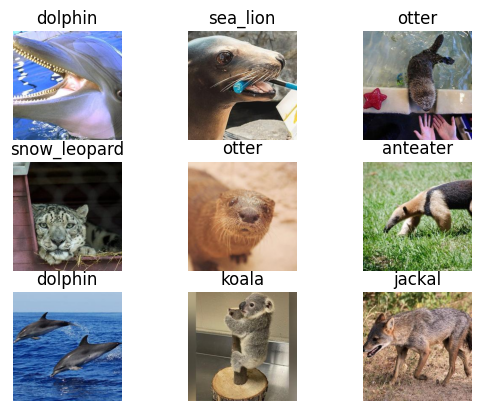

In [10]:
# Plotting 9 random images and their class from the dataset

import random
import matplotlib.pyplot as plt

# Get 9 random images and their labels
random_imgs = [train_data[random.randint(0, len(train_data))] for _ in range(9)]

# Plot the images and their labels
fig, axs = plt.subplots(3, 3)
for i, (img, label) in enumerate(random_imgs):
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.set_title(class_names[label])
    ax.axis('off')

plt.show()


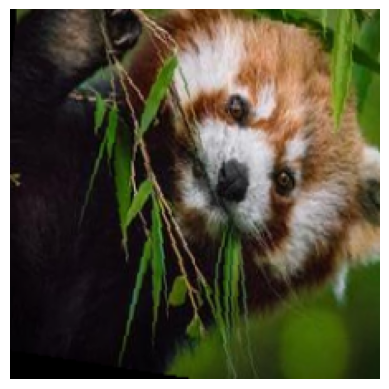

Label: red_panda


In [11]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Ensure the correct train_data is loaded with transformations
train_data = datasets.ImageFolder(train_dir, transform=train_transforms)

# Create the DataLoader
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)

# Get a batch of training data
imgs, labels = next(iter(train_dataloader))

# Function to show an image
def show_image(img):
    # Undo the normalization
    img = img.numpy().transpose(1, 2, 0)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Show the first image from the batch
show_image(imgs[0])
print(f"Label: {class_names[labels[0]]}")


# Data is now ready to be used for Training, Validation and then Testing

# My own code

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
my_model = Sequential([
    # First convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Fourth convolutional layer
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flattening the results to feed into a dense layer
    Flatten(),

    # 1024 neuron hidden layer
    Dense(1024, activation='relu'),
    Dropout(0.5),

    # Output layer with 45 neurons (one for each class)
    Dense(45, activation='softmax')
])

# Compile the model
my_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Print the model summary
my_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming the same transformations for train and validation as before
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescaling
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for validation

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Path to training data
    target_size=(224, 224),  # Target size for images
    batch_size=32,
    class_mode='categorical'  # Assuming you have more than 2 classes
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,  # Path to validation data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Now you can fit the model (make sure to use the correct model variable name)
history = my_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)


Found 9602 images belonging to 45 classes.
Found 2731 images belonging to 45 classes.
Epoch 1/20
301/301 [==============================] - 149s 469ms/step - loss: 3.6497 - accuracy: 0.0594 - val_loss: 3.4216 - val_accuracy: 0.0912
Epoch 2/20
301/301 [==============================] - 140s 467ms/step - loss: 3.4003 - accuracy: 0.1013 - val_loss: 3.1508 - val_accuracy: 0.1765
Epoch 3/20
301/301 [==============================] - 137s 455ms/step - loss: 3.2388 - accuracy: 0.1416 - val_loss: 3.1256 - val_accuracy: 0.1772
Epoch 4/20
301/301 [==============================] - 140s 466ms/step - loss: 3.1348 - accuracy: 0.1635 - val_loss: 2.9757 - val_accuracy: 0.2149
Epoch 5/20
301/301 [==============================] - 140s 465ms/step - loss: 3.0630 - accuracy: 0.1820 - val_loss: 2.8578 - val_accuracy: 0.2384
Epoch 6/20
301/301 [==============================] - 140s 466ms/step - loss: 2.9636 - accuracy: 0.2059 - val_loss: 2.7400 - val_accuracy: 0.2666
Epoch 7/20
301/301 [==================

In [45]:
# Save the custom model
my_model.save('my_keras_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Now the Pre Trained Model RESNET - 18

In [18]:
import torchvision.models as models

# Load pre-trained ResNet-18
resnet18 = models.resnet18(pretrained=True)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 60.5MB/s]


In [19]:
num_classes = len(train_data.classes)  # The number of classes in your dataset

# Replace the last fully connected layer (fc) with a new one
resnet18.fc = nn.Linear(resnet18.fc.in_features, num_classes)


In [20]:
# Freeze all layers
for param in resnet18.parameters():
    param.requires_grad = False

# Unfreeze the final layer
for param in resnet18.fc.parameters():
    param.requires_grad = True


In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet18.fc.parameters(), lr=0.001)  # Optimize only the final layer


In [26]:
from torch.utils.data import DataLoader

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),  # Converts PIL images to Tensors
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
# Recreate the validation dataset with the updated transformations
val_data = datasets.ImageFolder(val_dir, transform=val_transforms)

# Recreate the DataLoader for the validation dataset
val_dataloader = DataLoader(val_data, batch_size=32, shuffle=False)



In [27]:
# Assuming resnet18, criterion, optimizer, train_dataloader, val_dataloader are already defined

num_epochs = 10  # You can adjust this based on your dataset size and desired training length

resnet18 = resnet18.to(device)  # Move the model to the GPU if available

# Function for a training/validation epoch
def run_epoch(phase, dataloader):
    if phase == 'train':
        resnet18.train()  # Set model to training mode
    else:
        resnet18.eval()   # Set model to evaluate mode

    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        with torch.set_grad_enabled(phase == 'train'):
            outputs = resnet18(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            # Backward pass and optimize in training phase
            if phase == 'train':
                loss.backward()
                optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = running_corrects.double() / len(dataloader.dataset)

    print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

# Training loop
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    print('-' * 10)

    # Each epoch has a training and validation phase
    run_epoch('train', train_dataloader)
    run_epoch('val', val_dataloader)

print('Training complete')


Epoch 1/10
----------
train Loss: 0.9695 Acc: 0.7382
val Loss: 0.4444 Acc: 0.8726
Epoch 2/10
----------
train Loss: 0.9266 Acc: 0.7418
val Loss: 0.4126 Acc: 0.8795
Epoch 3/10
----------
train Loss: 0.8773 Acc: 0.7531
val Loss: 0.3820 Acc: 0.8869
Epoch 4/10
----------
train Loss: 0.8303 Acc: 0.7654
val Loss: 0.3816 Acc: 0.8902
Epoch 5/10
----------
train Loss: 0.8328 Acc: 0.7644
val Loss: 0.4083 Acc: 0.8766
Epoch 6/10
----------
train Loss: 0.8113 Acc: 0.7747
val Loss: 0.3698 Acc: 0.8876
Epoch 7/10
----------
train Loss: 0.8058 Acc: 0.7735
val Loss: 0.3498 Acc: 0.8934
Epoch 8/10
----------
train Loss: 0.7799 Acc: 0.7759
val Loss: 0.3515 Acc: 0.8982
Epoch 9/10
----------
train Loss: 0.7794 Acc: 0.7819
val Loss: 0.3554 Acc: 0.8923
Epoch 10/10
----------
train Loss: 0.7697 Acc: 0.7794
val Loss: 0.3609 Acc: 0.8891
Training complete


# Evaluating RESNET-18 model

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# test_transforms and test_dir are already defined

# Load the test dataset
test_data = datasets.ImageFolder(test_dir, transform=test_transforms)

# Create the DataLoader for the test dataset
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)  # Adjust the batch size if needed

# Set the model to evaluation mode
resnet18.eval()

# Collect all predictions and true labels
all_preds = []
all_labels = []

# No gradient is needed
with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = resnet18(inputs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate the classification report
print(classification_report(all_labels, all_preds, target_names=class_names))

# Optionally, calculate and display the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
print(conf_matrix)

# Calculate the overall accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f'Accuracy: {accuracy:.4f}')


                  precision    recall  f1-score   support

african_elephant       0.97      0.94      0.96        36
          alpaca       0.85      0.82      0.84        34
  american_bison       0.97      0.86      0.91        35
        anteater       0.67      0.94      0.78        31
      arctic_fox       0.97      0.94      0.95        32
       armadillo       0.97      0.91      0.94        34
          baboon       0.89      0.94      0.91        34
          badger       0.96      0.84      0.90        31
      blue_whale       0.75      0.96      0.84        25
      brown_bear       0.88      0.97      0.92        30
           camel       0.96      0.96      0.96        27
         dolphin       0.96      0.81      0.88        32
         giraffe       0.89      1.00      0.94        31
       groundhog       0.96      0.81      0.88        32
 highland_cattle       1.00      0.88      0.93        32
           horse       0.83      0.94      0.88        31
          jac

In [30]:
# Save the model
torch.save(resnet18.state_dict(), 'resnet18_trained.pth')


In [31]:
# Recreate the model (make sure it's the same architecture)
resnet18 = models.resnet18(pretrained=False)
resnet18.fc = nn.Linear(resnet18.fc.in_features, len(class_names))  # Adjust for your number of classes

# Load the saved state dictionary - remove hashtags before loading
#resnet18.load_state_dict(torch.load('resnet18_trained.pth'))
#resnet18 = resnet18.to(device)  # Move model to the appropriate device


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


# Evaluating custom CNN model

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)  # Rescaling

test_generator = test_datagen.flow_from_directory(
    test_dir,  # Path to the test data
    target_size=(224, 224),  # Same as the input size of your model
    batch_size=32,
    class_mode='categorical',  # Based on your problem (binary or categorical)
    shuffle=False  # Usually, we do not shuffle test data
)


Found 1418 images belonging to 45 classes.


In [33]:
# Evaluate the model on the test data
test_loss, test_accuracy = my_model.evaluate(test_generator)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


45/45 [==============================] - 5s 98ms/step - loss: 2.1968 - accuracy: 0.4013
Test Loss: 2.196798086166382
Test Accuracy: 0.40126940608024597


In [34]:
from sklearn.metrics import classification_report
import numpy as np

# Predict classes with the model
predictionss = my_model.predict(test_generator)
predicted_classess = np.argmax(predictionss, axis=1)

# True labels
true_classes = test_generator.classes

# Class labels (ensure this matches the order in the training dataset)
class_labels = list(test_generator.class_indices.keys())


45/45 [==============================] - 4s 87ms/step


In [35]:
# Calculate and print the classification report
print(classification_report(true_classes, predicted_classess, target_names=class_labels))


                  precision    recall  f1-score   support

african_elephant       0.21      0.67      0.32        36
          alpaca       0.67      0.12      0.20        34
  american_bison       0.44      0.43      0.43        35
        anteater       0.44      0.23      0.30        31
      arctic_fox       0.57      0.41      0.47        32
       armadillo       0.22      0.38      0.28        34
          baboon       0.38      0.15      0.21        34
          badger       0.79      0.35      0.49        31
      blue_whale       0.57      0.52      0.54        25
      brown_bear       0.38      0.20      0.26        30
           camel       0.37      0.41      0.39        27
         dolphin       0.56      0.56      0.56        32
         giraffe       0.43      0.65      0.52        31
       groundhog       0.54      0.41      0.46        32
 highland_cattle       0.52      0.47      0.49        32
           horse       0.26      0.23      0.24        31
          jac

# Model Comparison

#Accuracy

**ResNet-18 Model**: Shows a high accuracy of 89.63%, indicating it is very effective at classifying the different animals in your dataset.

**Custom CNN Model**: Has a lower accuracy of 40%, which suggests it struggles more with the classification task compared to ResNet-18.

#Precision, Recall, and F1-Score

**ResNet-18 Model**: Generally exhibits high precision, recall, and F1-scores across most classes. This implies that the model not only correctly identifies a high proportion of positive cases (high precision) but also captures a high percentage of actual positives (high recall). The F1-scores, which balance precision and recall, are also high, indicating robust performance across various classes.

**Custom CNN Model**: Displays a mixed performance with varying precision, recall, and F1-scores across classes. Some classes show reasonable results, but many others have low scores, indicating issues with both false positives (precision) and false negatives (recall). The overall lower F1-scores compared to ResNet-18 suggest that this model is less capable of balancing recall and precision.

#Class-by-Class Analysis
**Consistency Across Classes**: The ResNet-18 model demonstrates more consistent performance across different classes. In contrast, the custom CNN model shows significant variability in its ability to classify different animals.

**Standout Classes**: For certain classes, both models perform well (e.g., 'snow leopard', 'red panda' in ResNet-18; 'african_elephant', 'porcupine' in the custom CNN). However, the ResNet-18 model shows high performance in a larger number of classes.

#Overall Assessment
**ResNet-18 Model**: Exhibits a strong ability to generalize across various classes, likely benefiting from its pre-training on a large and diverse dataset. Its architecture also contributes to effectively capturing both low-level and high-level features in images.

**Custom CNN Model**: While showing some capability in classification, it is considerably less effective than the ResNet-18 model. This could be due to a variety of factors, including model architecture, depth, and the extent of training data. The custom model may benefit from further optimization, more training data, or additional layers/complexity.

#Conclusion
The ResNet-18 model significantly outperforms the custom CNN model in terms of accuracy, precision, recall, and F1-scores. Its consistency across various classes makes it a more reliable choice for this classification task. The custom CNN model, while a good effort, may require further refinement and training to improve its performance and achieve results closer to those of the ResNet-18 model.

In [46]:
import os
print(os.getcwd())


/content


In [48]:
# Saving models to file for future
# Path to save the ResNet-18 model
resnet18_save_path = '/content/drive/MyDrive/ATOMCAMP/Image_classification_Models/resnet18_trained.pth'
torch.save(resnet18.state_dict(), resnet18_save_path)

# Path to save the Keras model
my_model_save_path = '/content/drive/MyDrive/ATOMCAMP/Image_classification_Models/my_keras_model.h5'
my_model.save(my_model_save_path)
